In [1]:
import canopen

In [42]:
network = canopen.Network()
network.connect(channel='can1', bustype='socketcan', bitrate=500000)


In [43]:
node = network.add_node(1, '/home/pi/AC24ls.dcf')

In [61]:
node.sdo[0x6071].raw = 10
node.sdo[0x6071].raw

10

In [62]:
node.sdo[0x6071].raw

297

In [6]:
node.object_dictionary.values():
    print('0x%X: %s' % (obj.index, obj.name))
    if isinstance(obj, canopen.objectdictionary.Record):
        for subobj in obj.values():
            print('  %d: %s' % (subobj.subindex, subobj.name))

In [7]:
obj = node.object_dictionary[0x2020]
for subobj in obj.values():
            print('  %d: %s' % (subobj.subindex, subobj.name))

  0: Number of entries
  1: controlword - left motor
  2: statusword - left motor
  3: Target velocity - left motor
  4: Velocity actual value - left motor
  5: Max torque - left motor
  6: Actual torque - left motor


In [12]:
node.tpdo.read()
node.rpdo.read()

'Subindex 29 was not found'
'Subindex 31 was not found'
'Subindex 32 was not found'
'Subindex 33 was not found'


In [32]:
for key in node.rpdo.keys():
    print('Key=', key)
    print(node.tpdo[key].name)
    for var in node.tpdo[key].map:
        print('%s = %d' % (var.name, var.raw))       
        print(hex(var.od.index))
        print(var.offset)
        print(var.subindex)
    print('-------------')

Key= 1
TxPDO3_node17
Additional Motor Measurements.Target Id (If) = 0
0x4600
0
5
Additional Motor Measurements.Target Iq (Ia) = 0
0x4600
16
6
Additional Motor Measurements.Id (If) = -6
0x4600
32
7
Additional Motor Measurements.Iq (Ia) = -6
0x4600
48
8
-------------
Key= 2
RxPDO2_node48
Additional Motor Measurements.Ud (Uf) = 0
0x4600
0
9
Additional Motor Measurements.Uq (Ua) = 0
0x4600
16
10
Additional Motor Measurements.Voltage modulation = 0
0x4600
32
11
-------------
Key= 3
RxPDO3_node17
Additional Motor Measurements.Temperature (Measured - PTC) = 32212
0x4600
0
3
-------------
Key= 4
RxPDO1_node113
Device Measurements.Capacitor Voltage = 1456
0x5100
0
3
Device Measurements.Heatsink Temperature = 19
0x5100
16
4
Device Measurements.Battery Current = 0
0x5100
24
2
Motor drive left information.Max torque - left motor = 0
0x2020
40
5
-------------
Key= 5
RxPDO3_node84
Digital Input states.Digital Inputs 1..8 states = 0
0x6800
0
1
Velocity = 0
0x606c
8
0
-------------


In [41]:
node.sdo[0x6071].raw

SdoCommunicationError: Node returned a value for 0x4602:23 instead, maybe there is another SDO client communicating on the same SDO channel?

In [34]:
0x19

25

In [28]:
for v in node.sdo[0x4602].values():
    print(v.name)

AC Motor Debug Information.Number of entries
AC Motor Debug Information.Motor Temperature/Torque Cutback (DWork.Tj_cutback_factor)
AC Motor Debug Information.Junction Temperature 1 (DWork.Tj[0])
AC Motor Debug Information.Junction Temperature 2 (DWork.Tj[1])
AC Motor Debug Information.Junction Temperature 3 (DWork.Tj[2])
AC Motor Debug Information.Junction Temperature 4 (DWork.Tj[3])
AC Motor Debug Information.Junction Temperature 5 (DWork.Tj[4])
AC Motor Debug Information.Junction Temperature 6 (DWork.Tj[5])
AC Motor Debug Information.Motor Temperature Estimate (DWork.T_motor)
AC Motor Debug Information.Heatsink Temperature (U.DSP_Ts)
AC Motor Debug Information.Overall DSP Maximum Motor Temperature (Y.Temp_max)
AC Motor Debug Information.Torque demand value (U.T_d)
AC Motor Debug Information.Torque actual value (DWork.Td)
AC Motor Debug Information.Maximum torque (DWork.Td_max)
AC Motor Debug Information.Maximum power limit torque (Y.T_power_limit)
AC Motor Debug Information.Trip Volt

In [55]:
def print_speed(message):
    print('%s received' % message.name)
    for var in message:
        print('%s = %d' % (var.name, var.raw))

node.tpdo[4].add_callback(print_speed)

RxPDO1_node113 received
Device Measurements.Capacitor Voltage = 1457
Device Measurements.Heatsink Temperature = 20
Device Measurements.Battery Current = 0
Motor drive left information.Max torque - left motor = 0
RxPDO1_node113 received
Device Measurements.Capacitor Voltage = 1457
Device Measurements.Heatsink Temperature = 20
Device Measurements.Battery Current = 0
Motor drive left information.Max torque - left motor = 0
RxPDO1_node113 received
Device Measurements.Capacitor Voltage = 1457
Device Measurements.Heatsink Temperature = 20
Device Measurements.Battery Current = 0
Motor drive left information.Max torque - left motor = 0
RxPDO1_node113 received
Device Measurements.Capacitor Voltage = 1457
Device Measurements.Heatsink Temperature = 20
Device Measurements.Battery Current = 0
Motor drive left information.Max torque - left motor = 0
RxPDO1_node113 received
Device Measurements.Capacitor Voltage = 1457
Device Measurements.Heatsink Temperature = 20
Device Measurements.Battery Current =

In [ ]:
# Motor debug info
motor = node.sdo[0x4602]
torque_demand = motor[11] * 0.0625


In [4]:
# Throttle Input Voltage, V
print('Throttle input voltage, V: ', node.sdo[0x2220].raw * 0.00390625)

Throttle input voltage, V:  0.03515625


In [5]:
node.sdo[0x4602][11].raw

0

In [6]:
print('Digital input states')
input_count = node.sdo[0x6800][0].raw
input_states = bin(node.sdo[0x6800][1].raw)
print(f'Input count {input_count}')
print(f'Input states {input_states}')

Digital input states
Input count 2
Input states 0b0


In [7]:
print('Analog input values')
input_count = node.sdo[0x6C01][0].raw

print(f'Analog Input count {input_count}')

for i in range(input_count):
    input_state = node.sdo[0x6C01][i + 1].raw * 0.00390625
    print(f'Analog input {i} = {input_state}')

Analog input values
Analog Input count 5
Analog input 0 = 0.05078125
Analog input 1 = 0.16796875
Analog input 2 = 12.90625
Analog input 3 = 0.0
Analog input 4 = 2.76171875


In [8]:
print('Forward Switch ', node.sdo[0x2121].raw)
print('Reverse Switch ', node.sdo[0x2122].raw)

Forward Switch  False
Reverse Switch  False


In [9]:
print('Throttle flags ', bin(node.sdo[0x2910][0].raw))

Throttle flags  0b10000


In [10]:
# count = node.sdo[0x5100][0].raw
# for i in range(1,count):
#     print(i, node.sdo[0x5100][i].raw)
device_status=node.sdo[0x5100]

print('Battery Voltage, V ', device_status[1].raw * 0.0625)
print('Battery Current, A ', device_status[2].raw * 0.0625)
print('Capacitor Voltage, V ', device_status[7].raw * 0.25)

Battery Voltage, V  91.6875
Battery Current, A  0.0
Capacitor Voltage, V  63.75


In [9]:
node.sdo[0x606C].raw # SPEED!!!

0

In [17]:
for v in node.sdo.values():
    print(v.name)

Dummy0001
Dummy0005
Dummy0006
Dummy0007
Device type
Error register
Synchronization (SYNC) message COB-ID
Interval between SYNC messages (Communication cycle period)
Product name
Hardware version
Software version


AttributeError: 'Record' object has no attribute 'name'

In [11]:
node.tpdo.read()
node.rpdo.read()

'Subindex 29 was not found'
'Subindex 31 was not found'
'Subindex 32 was not found'
'Subindex 33 was not found'


In [13]:
print('Battery Voltage, V ', device_status[1].raw * 0.0625)
print('Battery Current, A ', device_status[2].raw * 0.0625)
print('Capacitor Voltage, V ', device_status[7].raw * 0.25)

In [9]:
node.sdo[0x6071].raw = 100# Target torque

SdoCommunicationError: No SDO response received

In [30]:
anode.sdo.upload(0x606B, 0)

b'\x00\x00\x00\x00'

In [8]:
bin((0x600 + 0x1))

'0b11000000001'

In [9]:
node_id = 1

In [14]:
from canopen.sdo import SdoClient
sdo_client = SdoClient(0x600 + node_id, 0x580 + node_id, None)
sdo_client.network = network
    # Subscribe to SDO responses
network.subscribe(0x580 + node_id, sdo_client.on_response)


In [15]:
eds_fp = sdo_client.open(0x1021, 0, "rt")

SdoAbortedError: Code 0x06020000, Object does not exist

In [16]:
eds_fp = sdo_client.open(0x1000, 0, "rt")

In [18]:
from configparser import RawConfigParser, NoOptionError, NoSectionError

In [19]:
eds = RawConfigParser()

In [23]:
source = eds_fp
fp = source

In [24]:
eds.read_file(fp)

MissingSectionHeaderError: File contains no section headers.
file: '<???>', line: 1
'\x00\x00\x00\x00'

In [25]:
fp.close()

<IPython.core.display.Javascript object>


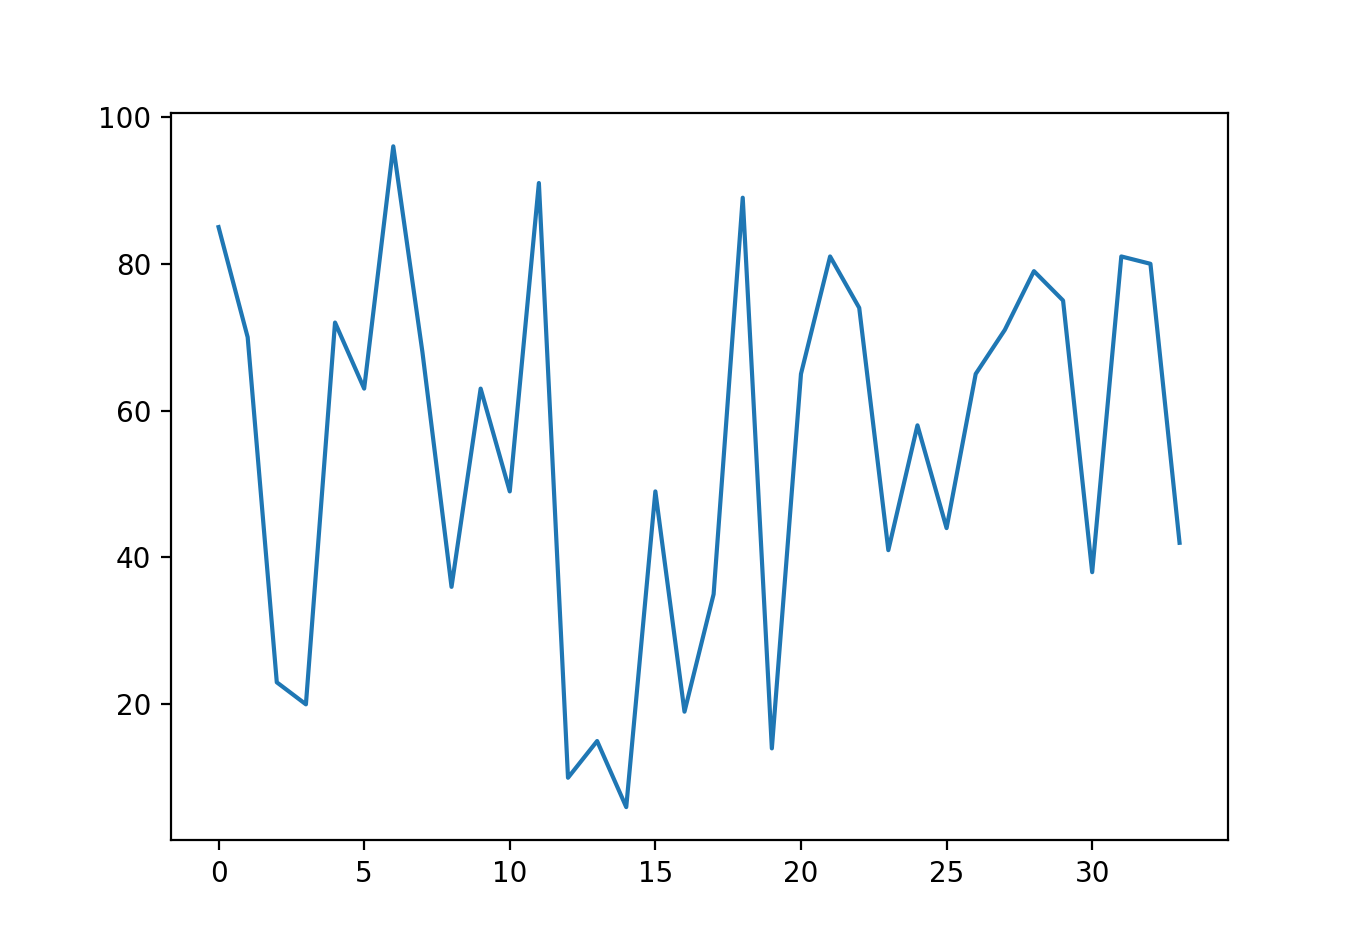

In [7]:
%matplotlib notebook

from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from random import randrange
from threading import Thread
import time

class LiveGraph:
    def __init__(self):
        self.x_data, self.y_data = [], []
        self.figure = plt.figure()
        self.line, = plt.plot(self.x_data, self.y_data)
        self.animation = FuncAnimation(self.figure, self.update, interval=1000)
        self.th = Thread(target=self.thread_f, daemon=True)
        self.th.start()

    def update(self, frame):
        self.line.set_data(self.x_data, self.y_data)
        self.figure.gca().relim()
        self.figure.gca().autoscale_view()
        return self.line,

    def show(self):
        plt.show()

    def thread_f(self):
        x = 0
        while True:
            self.x_data.append(x)
            x += 1
            self.y_data.append(randrange(0, 100))   
            time.sleep(1)  

g = LiveGraph()
g.show()

In [23]:
import peewee

ModuleNotFoundError: No module named 'peewee'

In [ ]:
from peewee import *

db = SqliteDatabase('motor_log.db')

class MotorState(Model):
    name = CharField()
    birthday = DateField()

    class Meta:
        database = db